# Day 5: Time Series Forecasting with ARIMA – Airline Passenger Dataset

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('AirPassengers.csv')


In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [4]:
# Convert 'Month' to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)


In [5]:
# Display dataset info
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


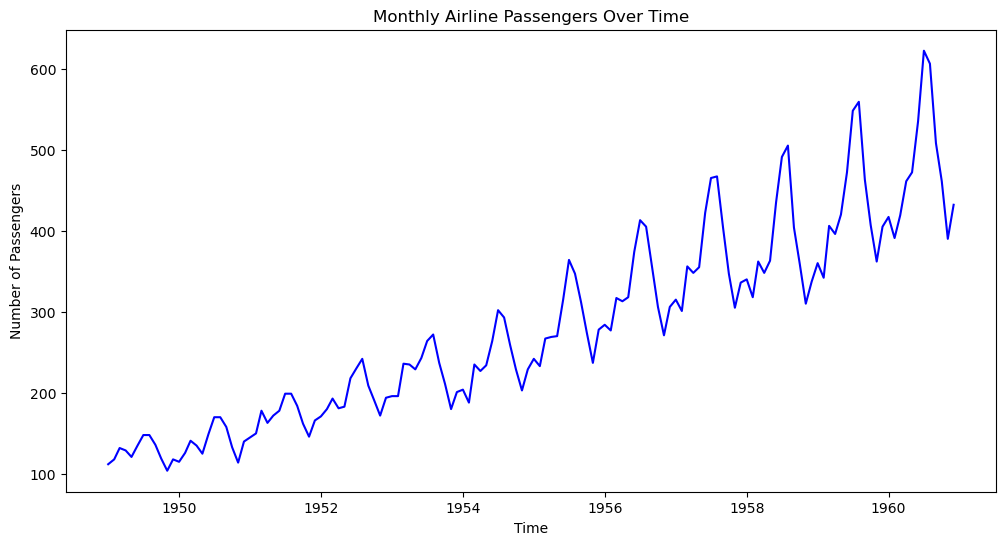

In [6]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['#Passengers'], color='blue')
plt.title('Monthly Airline Passengers Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.show()


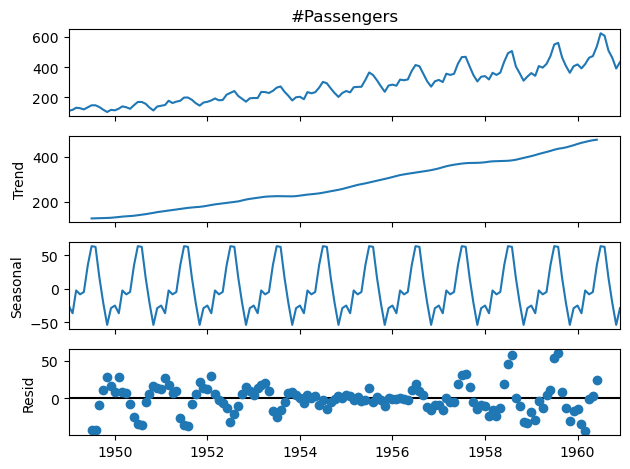

In [7]:
# Decompose Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['#Passengers'], model='additive', period=12)

decomposition.plot()
plt.show()

In [8]:
# Test Stationarity with Augmented Dickey-Fuller (ADF) Test
result = adfuller(df['#Passengers'])
print("\nADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary. Differencing is needed.")



ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411
The time series is not stationary. Differencing is needed.


In [9]:
# Differencing to make series stationary (if needed)
df['Passengers_diff'] = df['#Passengers'].diff().dropna()


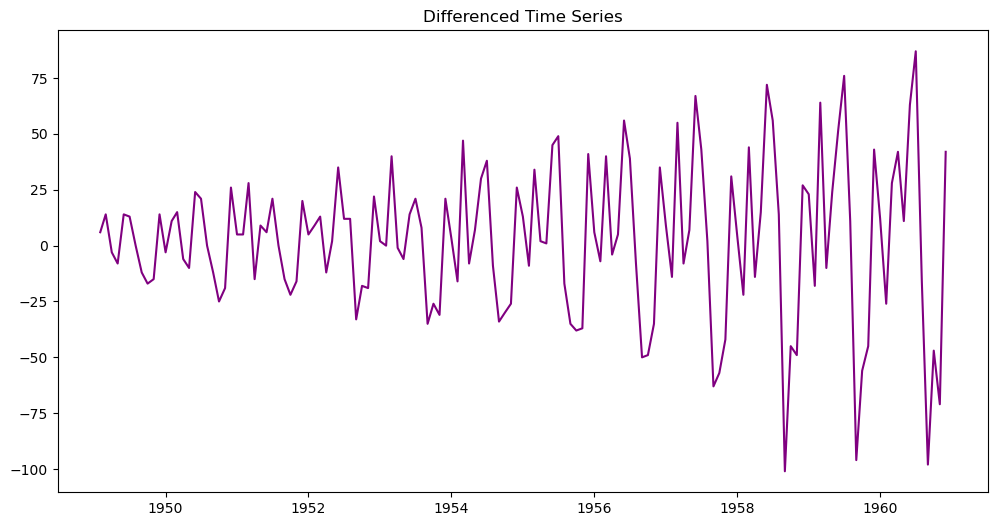

In [10]:
# Plot differenced series
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers_diff'], color='purple')
plt.title('Differenced Time Series')
plt.show()


In [11]:
# Re-test stationarity
result_diff = adfuller(df['Passengers_diff'].dropna())
print("\nDifferenced ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])
if result_diff[1] <= 0.05:
    print("The differenced series is stationary.")
else:
    print("The differenced series is not stationary.")



Differenced ADF Statistic: -2.829266824169992
p-value: 0.0542132902838265
The differenced series is not stationary.


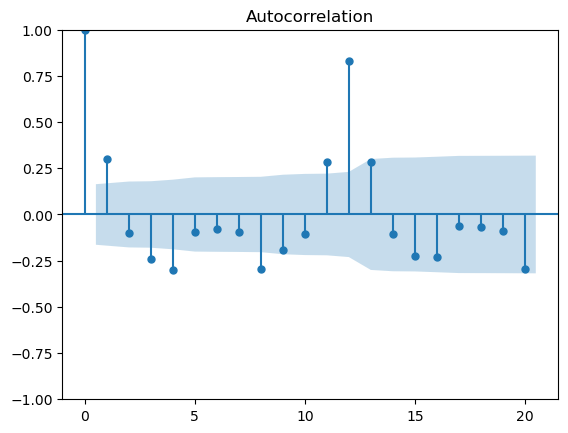

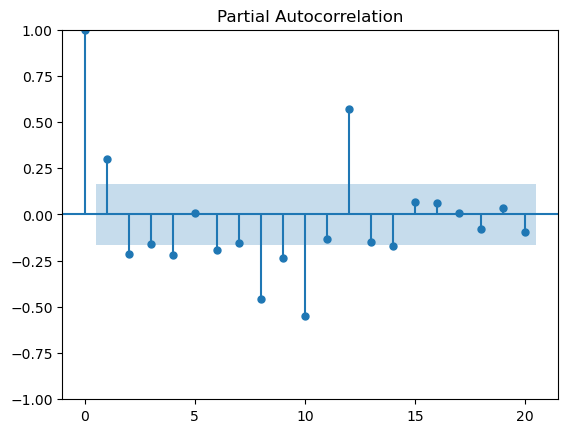

In [12]:
# Plot ACF and PACF
plot_acf(df['Passengers_diff'].dropna(), lags=20)
plot_pacf(df['Passengers_diff'].dropna(), lags=20)
plt.show()

In [13]:
# Define ARIMA model (adjust p, d, q based on ACF/PACF)
model = ARIMA(df['#Passengers'], order=(2,1,2))
arima_result = model.fit()

In [14]:
# Display model summary
print("\nARIMA Model Summary:")
print(arima_result.summary())


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Wed, 08 Jan 2025   AIC                           1353.347
Time:                        23:50:35   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.059      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.419      0.000      -0.989      -0.921
ma.L1         -1.8432      0.1

In [15]:
# Forecasting
df['Forecast'] = arima_result.predict(start=len(df)-12, end=len(df)+12, typ='levels')


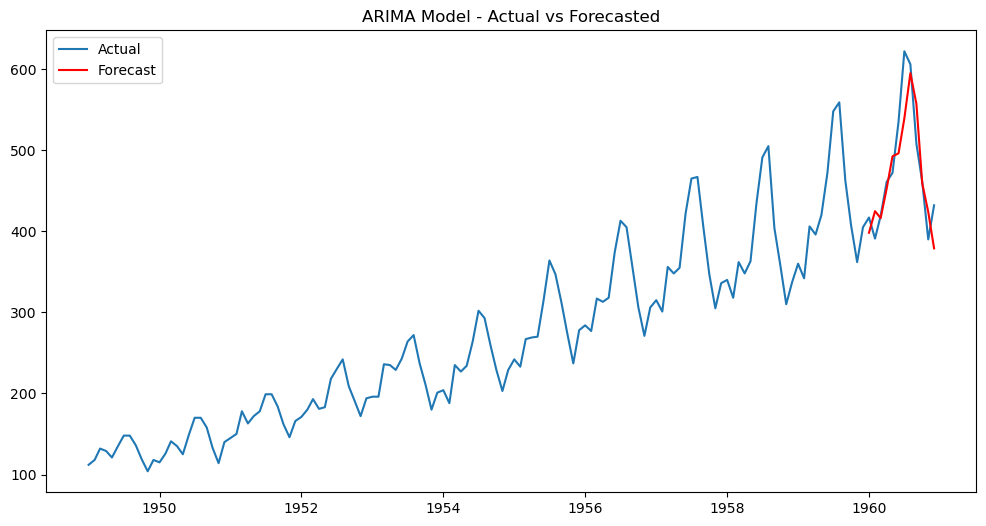

In [16]:
# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df['#Passengers'], label='Actual')
plt.plot(df['Forecast'], label='Forecast', color='red')
plt.title('ARIMA Model - Actual vs Forecasted')
plt.legend()
plt.show()

In [17]:
# Calculate error metrics
mae = mean_absolute_error(df['#Passengers'][-12:], df['Forecast'][-12:])
rmse = np.sqrt(mean_squared_error(df['#Passengers'][-12:], df['Forecast'][-12:]))
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 29.55
Root Mean Squared Error (RMSE): 37.48


In [18]:
# Forecast future 12 months
forecast = arima_result.forecast(steps=12)
forecast_index = pd.date_range(start=df.index[-1], periods=13, freq='M')[1:]


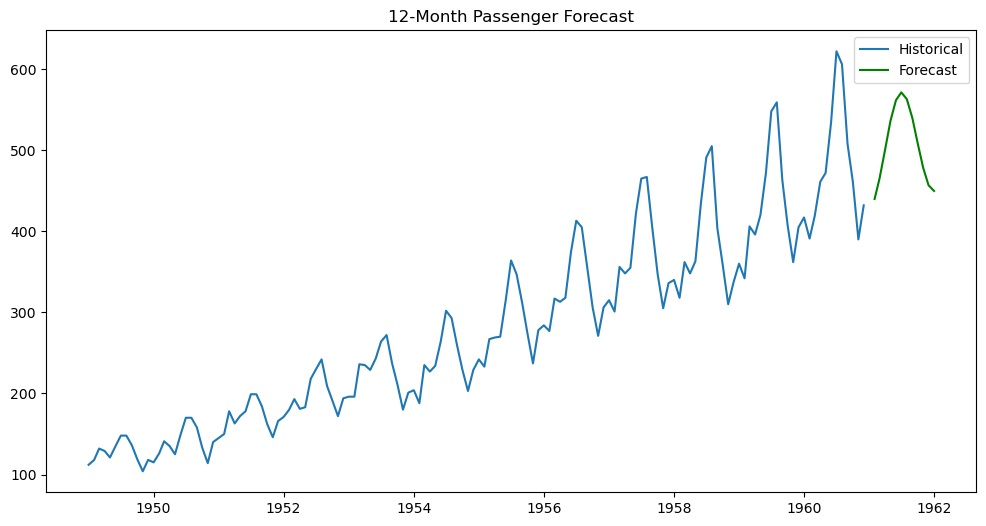

In [19]:
# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(df['#Passengers'], label='Historical')
plt.plot(forecast_index, forecast, label='Forecast', color='green')
plt.title('12-Month Passenger Forecast')
plt.legend()
plt.show()